Conjunto de Dados do Repositório de Machine Learning da UCI/Kaggle

In [1]:
#Importando modulos 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Carregando o dataset
df = pd.read_csv("diabetes.csv")

In [4]:
#Obtendo o shape dos dados
df.shape

(768, 9)

In [10]:
#Imprimindo primeiras linhas dos dados
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#Imprimindo as ultimas linhas do dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [18]:
#Verificando se existem valores nulos
df.isnull().values.any()

False

In [29]:
#Identificando a correlaçao entre as variaveis
#Correlao na implica casualidade
def plot_corr(df, size=13):
    corr = df.corr()
    fig, ax = plt.subplots(figsize= (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

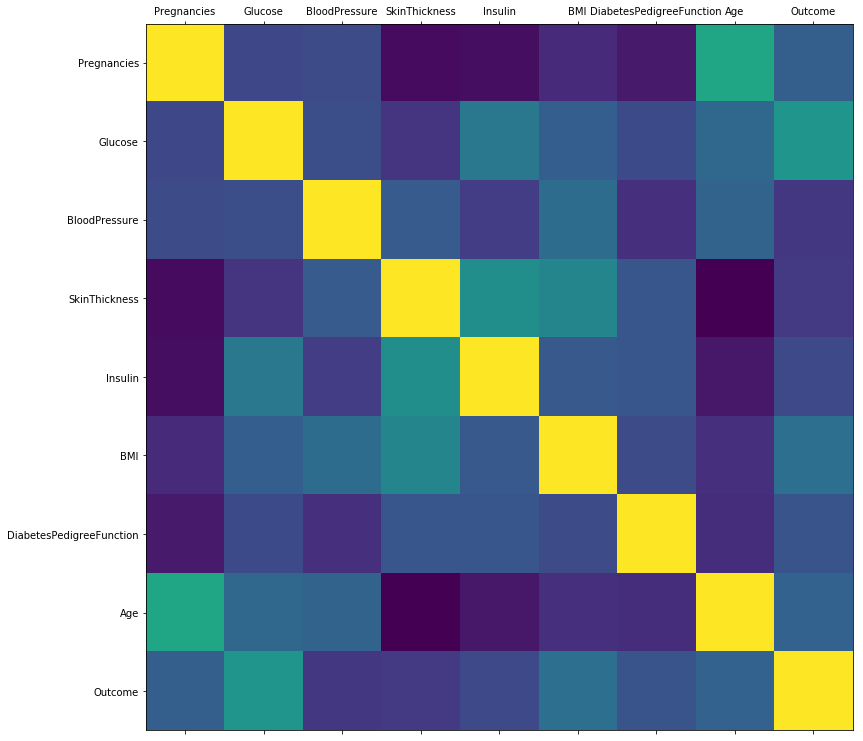

In [30]:
#Criando o Grafico
plot_corr(df)

In [31]:
#Visualizando correlaçao em tabela
#Coeficiente de Correlaçao:
# +1 = forte correlaçao
# 0 = nao há correlaçao
# -1 = forte correlaçao negativa

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [32]:
#Verificando como os dados estao distribuidos
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print("Numero de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Numero de Casos Falsos:      {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))


Numero de Casos Verdadeiros: 268 (34.90%)
Numero de Casos Falsos:      500 (65.10%)


Spliting

70% para dados de treino 30% para dados de teste

In [33]:
#Importando o modulo para realizar a divisao dos dados
from sklearn.model_selection import train_test_split

In [36]:
#Seleçao das variaveis preditoras 
atributos = ["Pregnancies", "Glucose", "BloodPressure",	"SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [37]:
# Variavel a ser prevista
target = ["Outcome"]

In [38]:
#Criando os objetos
X = df[atributos].values
Y = df[target].values

In [39]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
Y

In [41]:
#Definindo a taxa de split (SEPARAÇAO)
split_test_size = 0.30

In [42]:
#Criando os dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [43]:
#Imprimindo os resultados
print("{0:0.2f} nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f} nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92 nos dados de treino
30.08 nos dados de teste


In [44]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

VERIFICANDO O SPLIT

In [45]:
print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df["Outcome"] == 1]),
                                              len(df.loc[df["Outcome"] == 1])/len(df.index) * 100))

print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df["Outcome"] == 0]),
                                              len(df.loc[df["Outcome"] == 0])/len(df.index) * 100))

print("")
print("Training True: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                              len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100))

print("Training False: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                              len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100))

print("")
print("Test True: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                              len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100))

print("Test False: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                              len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100))

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (34.63%)
Test False: 151 (65.37%)


VALORES MISSING OCULTOS

In [46]:
#Verificando se existem valores nulos
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [47]:
#Imprimindo linhas do dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
#Verificando os valores "0´s" espalhados pelo dataset
print("# Linhas no dataframe: {0}".format(len(df)))
print("# Linhas missing Glucose: {0}".format(len(df.loc[df["Glucose"] == 0])))
print("# Linhas missing Insulin: {0}".format(len(df.loc[df["Insulin"] == 0])))
print("# Linhas missing BloodPressure: {0}".format(len(df.loc[df["BloodPressure"] == 0])))
print("# Linhas missing SkinThinckness: {0}".format(len(df.loc[df["SkinThickness"] == 0])))
print("# Linhas missing BMI: {0}".format(len(df.loc[df["BMI"] == 0])))
print("# Linhas missing Age: {0}".format(len(df.loc[df["Age"] == 0])))

# Linhas no dataframe: 768
# Linhas missing Glucose: 5
# Linhas missing Insulin: 374
# Linhas missing BloodPressure: 35
# Linhas missing SkinThinckness: 227
# Linhas missing BMI: 11
# Linhas missing Age: 0


TRATANDO DADOS MISSING IMPUTE

In [50]:
from sklearn.preprocessing import Imputer

In [53]:
#Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Susbstituindo os valores iguais a zero, pela media dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste) 

In [55]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

CONSTRUINDO E TREINANDO O MODELO

In [56]:
#Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [57]:
#Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [58]:
#Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None)

VERIFICANDO A EXATIDAO NO MODELO NOS DADOS DE TREINO

In [59]:
from sklearn import metrics

In [60]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7542



VERIFICANDO A EXATIDAO NO MODELO NOS DADOS DE TESTE

In [61]:
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7359



CRIANDO UMA CONFUSION MATRIX

In [62]:
#Criando uma confusion matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



OTIMIZANDO O MODELO COM RANDOMFOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#Criando o modelo
modelo_v2 = RandomForestClassifier(random_state = 42)

#Treinando o modelo
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [69]:
#Verificando os dados de Treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidao (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))
print("")

Exatidao (Accuracy): 0.9870



In [71]:
#Verificando os dados de Teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidao (Accuracy): {0:.4}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print("")

Exatidao (Accuracy): 0.71



CRIANDO A CONFIUSON MATRIX

In [75]:
#Criando uma confusion matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



FAZENDO PREVISOES COM O MODELO TREINADO

In [73]:
import pickle

In [77]:
file_name = "modelo_treinado_v2.sav"
pickle.dump(modelo_v2, open(file_name, "wb"))

In [84]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [85]:
#Carregando o modelo e fazendo previsoes com novos conjuntos de dados
loaded_model = pickle.load(open(file_name, "rb"))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[0].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]


FIM